### POLYNOMIAL REGRESSION

In [1]:
import d2l 
from mxnet import gluon, np, npx
from mxnet.gluon import nn
npx.set_np()

### GENERATING DATASET

In [2]:
maxdegree = 20

n_train, n_test = 100, 100

true_w = np.zeros(maxdegree)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

In [22]:
features = np.random.normal(size = (n_train + n_test, 1))
features = np.random.shuffle(features)

poly_features = np.power(features, np.arange(maxdegree).reshape(1,-1))
poly_features = poly_features / ( npx.gamma(np.arange(maxdegree) + 1).reshape(1, -1))

labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale= 0.1, size = labels.shape) 

### TRAINING AND TESTING

In [23]:
def evaluate_loss(net, data_iter, loss):
    metric = d2l.Accumulator(2) #sum loss, num_ex (two var)
    
    for X, y in data_iter:
        metric.add(loss(net(X), y).sum(), y.size) 
        
    return metric[0] / metric[1]

In [24]:
def train( train_features, test_features, train_labels, test_labels, num_epochs= 1000):
    
    loss = gluon.loss.L2Loss()
    
    net = nn.Sequential()
    net.add(nn.Dense(1, use_bias=False))
    net.initialize()
    
    batch_size = min(10, train_labels.shape[0])
    
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    test_iter = d2l.load_array((test_features, test_labels), batch_size, is_train= False)
    
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})
    
    animator = d2l.Animator(xlabel = 'epoch', ylabel = 'loss', yscale = 'log', 
                           xlim = [1, num_epochs], ylim = [1e-3, 1e2],
                           legend = ['train', 'test'])
    
    for epoch in range(1, num_epochs+1):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        
        if epoch % 50 == 0:
            
            animator.add(epoch, (evaluate_loss(net, train_iter, loss),
                                evaluate_loss(net, test_iter, loss)))
            
            print('weight', net[0].weight.data().asnumpy())

weight [[ 4.977661   1.1913917 -3.3920074  5.595111 ]]


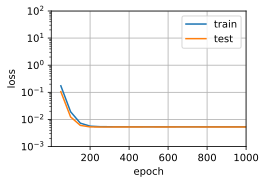

In [25]:
train( poly_features[:n_train, 0:4], poly_features[n_train:, 0:4],
     labels[:n_train], labels[n_train:])

### LINEAR FUNCTION

weight [[ 5.4594426  4.6834474 -4.2496853]]


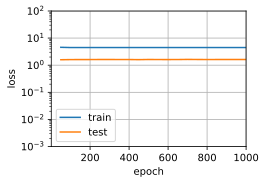

In [26]:
train(poly_features[:n_train, 0:3], poly_features[n_train:, 0:3],
     labels[:n_train], labels[n_train:])

### UNSIFFICIENT TRAINING

weight [[ 4.977404    1.3519845  -3.3706815   4.963221   -0.12691554  1.2383006
   0.3546187   0.0807813   0.04077888  0.01385139  0.07902765  0.03392006
  -0.06841819  0.01518353 -0.04494032  0.01105686  0.01580401 -0.04618578
  -0.05860829  0.02609068]]


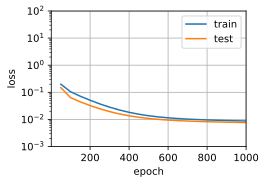

In [27]:
n_subset = 100
n_degree = 20

train(poly_features[:n_subset, 0:n_degree],
     poly_features[n_train:, 0:n_degree], labels[0:n_subset],
     labels[n_train:])